<a href="https://colab.research.google.com/github/tashfeen786/Handling-imbalanced-data-/blob/main/Handling_imbalanced_data_in_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                 **Handling imbalanced data in customer churn prediction**

Customer churn prediction is to measure why customers are leaving a business. we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model. We will then handle imbalance in data using various techniques and improve f1-score

In [ ]:
import pandas as pd # Import pandas library for data manipulation and analysis
import numpy as np   # Import numpy library for numerical operations (arrays, math functions, etc.)
import matplotlib.pyplot as plt  # Import matplotlib's pyplot module for data visualization

In [ ]:
import warnings                          # Import the warnings module to handle warning messages
warnings.filterwarnings('ignore')       # Tells Python to ignore all warning messages (useful to clean notebook output)


In [ ]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")  # Loads the dataset from the specified path into a pandas DataFrame named 'df'
df.sample(5)         # Displays a random sample of 5 rows from the dataset to quickly preview the data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5657,3096-GKWEB,Male,0,Yes,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.75,1691.9,No
2158,9297-FVVDH,Female,0,Yes,Yes,57,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,84.50,4845.4,No
2599,6384-VMJHP,Female,0,No,No,72,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),73.00,5265.2,No
3012,2160-GPFXD,Male,0,Yes,Yes,54,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),65.65,3566.7,No
2016,8861-HGGKB,Female,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,86.45,830.85,Yes


In [ ]:
df.Churn.value_counts()  # Counts how many customers have churned ('Yes') vs. not churned ('No')


,count
Churn,
No,5174
Yes,1869


First of all, drop customerID column as it is of no use

In [ ]:
df.drop('customerID', axis='columns', inplace=True)  # Removes the 'customerID' column from the DataFrame permanently


In [ ]:
df.dtypes  # display datatype

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column**

In [ ]:
df.TotalCharges.values  # Returns all the values in the 'TotalCharges' column as a NumPy array


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#it is string. Lets convert it to **numbers**

In [ ]:
# Convert the 'TotalCharges' column to numeric, coercing errors (e.g., empty strings) into NaN
# Then check which rows have become NaN (i.e., had invalid/non-numeric values)
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()


,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
# Display rows where 'TotalCharges' could not be converted to numeric (i.e., are null after coercion)
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# Get the number of rows and columns in the DataFrame
df.shape


(7043, 20)

In [ ]:
# Access the 'TotalCharges' value of the 489th row (index 488, since indexing starts at 0)
df.iloc[488].TotalCharges


' '

In [ ]:
# Filter out rows where 'TotalCharges' is not an empty string (' ')
# Then show the shape (rows, columns) of the resulting DataFrame
df[df.TotalCharges != ' '].shape


(7032, 20)

In [ ]:
# Create a new DataFrame 'df1' by keeping only the rows where 'TotalCharges' is not an empty string
df1 = df[df.TotalCharges != ' ']

# Display the shape (number of rows and columns) of the new DataFrame 'df1'
df1.shape


(7032, 20)

In [ ]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
# Convert the 'TotalCharges' column in df1 from string to numeric (float) values
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [ ]:

# Display the underlying NumPy array of TotalCharges column (as float values)
df1.TotalCharges.values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
# Filter and display only the rows where the customer did not churn
df1[df1.Churn == 'No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# **Data Visualization**

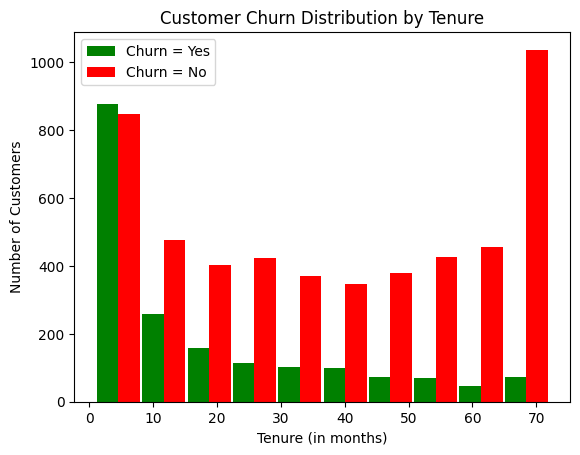

In [ ]:
# Separate tenure data for churned and non-churned customers
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

# Set axis labels and chart title
plt.xlabel("Tenure (in months)")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution by Tenure")

# Plot histogram to compare churn vs non-churn customers by tenure
plt.hist([tenure_churn_yes, tenure_churn_no],
         color=['green', 'red'],
         label=['Churn = Yes', 'Churn = No'],
         rwidth=0.95)

# Display legend
plt.legend()
plt.show()


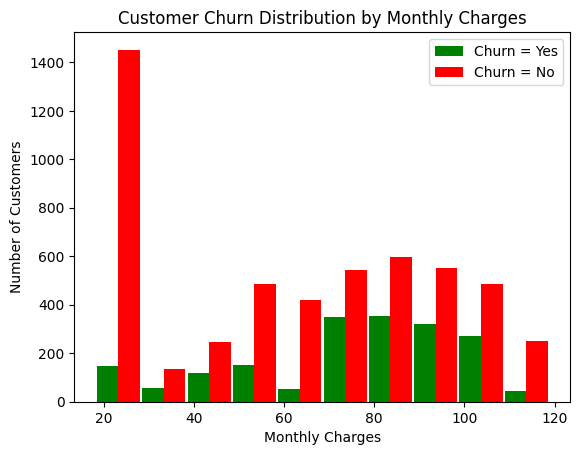

In [ ]:
# Separate MonthlyCharges for churned and non-churned customers
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

# Set axis labels and chart title
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution by Monthly Charges")

# Plot histogram
plt.hist([mc_churn_yes, mc_churn_no],
         rwidth=0.95,
         color=['green', 'red'],
         label=['Churn = Yes', 'Churn = No'])

# Add legend and show the plot
plt.legend()
plt.show()


# Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [ ]:
def print_unique_col_values(df):
    # Loop through each column in the DataFrame
    for column in df:
        # Check if the column's data type is 'object' (i.e., typically string/categorical data)
        if df[column].dtypes == 'object':
            # Print the column name and its unique values
            print(f'{column}: {df[column].unique()}')


In [ ]:
print_unique_col_values(df1)  # Calls the function to print all unique values from object (categorical) columns in df1


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [ ]:
df1.replace('No internet service','No',inplace=True)  # Replaces 'No internet service' with 'No' to simplify categorical values
df1.replace('No phone service','No',inplace=True)      # Replaces 'No phone service' with 'No' for consistency in data


In [ ]:
print_unique_col_values(df1)  # Displays unique values for each object (categorical) column in the dataframe df1


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# Convert Yes and No to 1 or 0

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
# Replacing 'Yes' with 1 and 'No' with 0 in specified columns
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0}, inplace=True)


In [ ]:
# Loop through all columns in the DataFrame and print the unique values for each column
for col in df1:
    print(f'{col}: {df1[col].unique()}')


gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0}, inplace=True)  # Convert 'gender' column to binary: Female → 1, Male → 0


In [ ]:
df1.gender.unique()  # Displays the unique values in the 'gender' column to verify conversion


array([1, 0])

# One hot encoding for categorical columns

In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])  # One-hot encodes specified categorical columns
df2.columns  # Displays all column names in the new DataFrame after encoding


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2046,1,0,0,1,1,0,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
1060,0,0,1,1,26,1,0,0,0,0,...,False,False,True,False,True,False,True,False,False,False
4255,0,0,1,0,13,1,1,0,0,1,...,True,False,False,False,True,False,False,False,False,True
1028,0,0,1,1,26,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
6139,0,0,0,1,3,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False


In [ ]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Numeric columns to be scaled

from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler from scikit-learn
scaler = MinMaxScaler()  # Creating an instance of MinMaxScaler

# Applying MinMax scaling to the selected columns
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [ ]:
# Loop through all columns in df2
for col in df2:
    # Print the column name and its unique values
    print(f'{col}: {df2[col].unique()}')


gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Train test split

In [ ]:
# Drop the 'Churn' column from df2 to create the feature matrix X
X = df2.drop('Churn', axis='columns')

# Set y and testLabels as the target column 'Churn' converted to float32
y = testLabels = df2.Churn.astype(np.float32)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,                   # Features and labels
    test_size=0.2,          # 20% of the data for testing
    random_state=15,        # Ensures reproducibility of the split
    stratify=y              # Preserves class distribution in both sets
)


In [ ]:
# Show the count of each class (0 = No churn, 1 = Yes churn) in the training set
y_train.value_counts()


,count
Churn,
0.0,4130
1.0,1495


In [ ]:
y.value_counts()

,count
Churn,
0.0,5163
1.0,1869


In [ ]:
y_test.value_counts()

,count
Churn,
0.0,1033
1.0,374


In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
2446,1,0,0,0,0.239437,1,1,0,1,0,...,False,True,False,True,False,False,False,True,False,False
1680,0,0,1,1,0.774648,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
2220,0,0,1,0,1.000000,1,0,1,1,0,...,True,False,False,False,False,True,True,False,False,False
2842,1,0,0,0,0.042254,0,0,1,0,1,...,True,False,False,True,False,False,False,False,False,True
5131,1,0,1,0,0.605634,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
4372,0,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
4687,0,0,1,0,0.295775,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
2385,1,0,0,1,0.028169,0,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
6773,0,1,1,0,0.507042,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
len(X_train.columns)

26

# Build a model (ANN) in tensorflow/keras

In [ ]:
# Import TensorFlow library for building and training deep learning models
import tensorflow as tf

# Import the Keras API from TensorFlow, used for creating neural networks
from tensorflow import keras

# Import evaluation metrics from scikit-learn for assessing model performance
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Define a function to build, compile, and train an Artificial Neural Network (ANN)
def ANN(X_train, y_train, X_test, y_test, loss, weights):

    # Create a Sequential model with 3 layers
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),  # Input layer with 26 neurons and ReLU activation
        keras.layers.Dense(15, activation='relu'),               # Hidden layer with 15 neurons and ReLU activation
        keras.layers.Dense(1, activation='sigmoid')              # Output layer with 1 neuron and sigmoid activation
    ])

    # Compile the model using the specified loss function and 'adam' optimizer
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    # Train the model for 100 epochs; use class weights if provided
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)  # No class weighting
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)  # With class weights

    # Evaluate the model on test data
    print(model.evaluate(X_test, y_test))

    # Predict on test data
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)  # Round predictions to 0 or 1

    # Print the classification report comparing predictions to actual labels
    print("Classification Report: \n", classification_report(y_test, y_preds))

    # Return the predictions
    return y_preds


In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)  # bc = binary_crossentropy, used for binary classification loss


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6696 - loss: 0.5958
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.4203
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.4296
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8016 - loss: 0.4137
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7895 - loss: 0.4268
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7995 - loss: 0.4197
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4187
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8056 - loss: 0.4167
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4127
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8098 - loss: 0.4007
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8044 - loss: 0.4000
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

# Mitigating Skewdness of Data

**Method 1: Undersampling**

reference: https://www.kaggle.com/rafjaaresampling-strategies-for-imbalanced-datasets

In [ ]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [ ]:
# Undersample 0-class and concat the DataFrames of both classes
df_class_0_under = df_class_0.sample(count_class_1)  # Randomly sample from class 0 to match class 1 count
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)  # Combine the undersampled class 0 with class 1

print('Random under-sampling:')  # Print message to indicate undersampling method
print(df_test_under.Churn.value_counts())  # Show the new class distribution after undersampling


Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [ ]:
# Separate features and target variable from the balanced dataset
X = df_test_under.drop('Churn', axis='columns')  # Features (all columns except 'Churn')
y = df_test_under['Churn']  # Target (Churn column)

# Split the dataset into training and testing sets with stratified sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% for testing
    random_state=15,         # For reproducibility
    stratify=y               # Maintain class distribution in splits
)


In [ ]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
0,1495
1,1495


**Printing Classification in the last, Scroll down till the last epoch to watch the classification report**

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5875 - loss: 0.6671
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7380 - loss: 0.5358
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7566 - loss: 0.5051
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.4939
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 0.4723
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7693 - loss: 0.4779
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7758 - loss: 0.4829
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7732 - loss: 0.4673
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7459 - loss: 0.4962
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7749 - loss: 0.4697
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.4559
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

Check classification report above. f1-score for minority class 1 improved from 0.56 to 0.74. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

**# Method2: Oversampling**

In [ ]:
# Oversample the minority class (Churn = 1) by randomly duplicating its rows
df_class_1_over = df_class_1.sample(count_class_0, replace=True)  # Upsample to match majority class count

# Combine the oversampled minority class with the majority class
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# Display class distribution after over-sampling
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())  # Should now show balanced classes


Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [ ]:
# Separate features and target variable from the oversampled dataset
X = df_test_over.drop('Churn', axis='columns')  # Features (all columns except 'Churn')
y = df_test_over['Churn']  # Target variable (Churn)

# Split the oversampled data into training and testing sets, maintaining class balance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% data for testing
    random_state=15,         # Fix random state for reproducibility
    stratify=y               # Stratify to keep balanced classes in both splits
)


In [ ]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [ ]:
loss = keras.losses.BinaryCrossentropy()  # Define binary cross-entropy loss for binary classification
weights = -1  # No class weights applied during training

# Train and evaluate the ANN model using binary cross-entropy loss without class weighting
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', weights)


Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7040 - loss: 0.5973
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7581 - loss: 0.4991
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7613 - loss: 0.4961
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7620 - loss: 0.4926
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7740 - loss: 0.4785
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7659 - loss: 0.4716
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7635 - loss: 0.4805
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7745 - loss: 0.4632
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7799 - loss: 0.4674
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7738 - loss: 0.4619
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7701 - loss: 0.4716
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.80. Score for class 0 reduced to 0.77 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

# **Method3: SMOTE**
To install imbalanced-learn library use pip install imbalanced-learn command

In [ ]:
# Separate features and target variable
X = df2.drop('Churn', axis='columns')  # Features (all columns except 'Churn')
y = df2['Churn']                        # Target variable ('Churn')


In [ ]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Create SMOTE object with strategy to oversample the minority class
smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE to feature set (X) and target (y)
X_sm, y_sm = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
y_sm.value_counts()


,count
Churn,
0,5163
1,5163


In [ ]:
from sklearn.model_selection import train_test_split

# Split the balanced dataset into training and testing sets
# test_size=0.2 → 20% for testing, 80% for training
# random_state=15 → ensures reproducibility
# stratify=y_sm → keeps the same proportion of each class in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm
)


In [ ]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [ ]:
# Train and evaluate the ANN model using:
# - X_train, y_train: SMOTE-balanced training data
# - X_test, y_test: SMOTE-balanced testing data
# - 'binary_crossentropy': suitable loss function for binary classification
# - -1: indicates no class weighting (use default)

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6723 - loss: 0.6024
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7664 - loss: 0.4849
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7714 - loss: 0.4729
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7781 - loss: 0.4591
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7872 - loss: 0.4537
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7861 - loss: 0.4510
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7862 - loss: 0.4492
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8011 - loss: 0.4330
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7944 - loss: 0.4348
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7910 - loss: 0.4387
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8046 - loss: 0.4230
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80

# **Method4: Use of Ensemble with undersampling**

In [ ]:
df2.Churn.value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
# Split the dataset into training and testing sets
# X and y are split such that 20% of the data is used for testing and 80% for training
# `random_state=15` ensures reproducibility of the split
# `stratify=y` ensures that the class distribution is preserved in both training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [ ]:
# Display the count of each class label in the training data after the split
y_train.value_counts()


,count
Churn,
0,4130
1,1495


model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [ ]:
# Make a copy of X_train and add the target column 'Churn' to it
df3 = X_train.copy()
df3['Churn'] = y_train


In [ ]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,True,False,True,False,False,False,False,False,True,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,True,False,True,False,False,False,True,False,False,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,False,False,False,False,True,True,False,False,False,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,False,False,True,False,False,False,False,False,True,0


In [ ]:
# Separate the dataset into two classes based on the 'Churn' column
df3_class0 = df3[df3.Churn == 0]  # All rows where Churn is 0
df3_class1 = df3[df3.Churn == 1]  # All rows where Churn is 1


In [ ]:
# Function to create a training batch by combining a slice of the majority class with all of the minority class
def get_train_batch(df_majority, df_minority, start, end):
    # Concatenate a batch from the majority class with the entire minority class
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    # Separate features and target
    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train


In [ ]:
# Generate a training batch with a subset of class 0 and all of class 1
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

# Train and evaluate the ANN model using binary crossentropy as loss function
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5622 - loss: 0.6715
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7624 - loss: 0.5154
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7635 - loss: 0.4954
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7758 - loss: 0.4855
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7609 - loss: 0.4859
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7676 - loss: 0.4770
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7504 - loss: 0.5008
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7791 - loss: 0.4683
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7658 - loss: 0.4674
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 0.4616
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7738 - loss: 0.4674
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
# Generate another training batch with the next subset of class 0 and all of class 1
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

# Train and evaluate the ANN model using the new batch
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5734 - loss: 0.6732
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7382 - loss: 0.5419
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7646 - loss: 0.4876
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7521 - loss: 0.4994
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7734 - loss: 0.4809
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7571 - loss: 0.4962
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7711 - loss: 0.4734
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7635 - loss: 0.4712
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7843 - loss: 0.4533
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7576 - loss: 0.4810
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.4668
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
# Generate a third training batch with the next subset of class 0 and all of class 1
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

# Train and evaluate the ANN model using the third batch
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5951 - loss: 0.6703
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7621 - loss: 0.5223
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7592 - loss: 0.5066
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7714 - loss: 0.4972
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 0.4787
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.4803
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.4684
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.4580
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7744 - loss: 0.4771
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7920 - loss: 0.4626
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7749 - loss: 0.4711
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [ ]:
len(y_pred1)

1407

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.73      1407



f1-score for minority class 1 improved to 0.58 from 0.57. The score for majority class 0 is suffering and reduced to 0.76 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes